# Showing that a square wave is a sum of sine waves

I'll use the following formula for a square wave:

$$
f(t) = \sum_{n=1}^{\infty} \frac{4}{\pi(2n-1)} \sin((2n-1)\omega t)
$$

where ω is the angular frequency, and we'll consider a square wave with a frequency of 1 Hz for simplicity.

### Setup

In [3]:
import numpy as np
import matplotlib.pyplot as plt

### Defining functions

In [4]:
def square_wave(t: float, f: float, amp: float = 1.0):
    return amp * np.sign(np.sin(2 * np.pi * f * t))

def fourier_series_square_wave(t: float, num_terms: int = 10):
    res: int = 0.0
    for n in range(1, num_terms + 1):
        omega = 2 * np.pi * (2 * n - 1)
        res += (4 / (np.pi * (2 * n - 1))) * np.sin(omega * t)
    return res

### Plotting the square wave and its Fourier series approx.

In [5]:
# Time vector
t = np.linspace(0, 2, 1000, endpoint=False)

# Generate a square wave
square_wave_values = square_wave(t, f=1)

# Calculate the Fourier series approx.
num_terms = 10
fourier_approx = fourier_series_square_wave(t, num_terms)

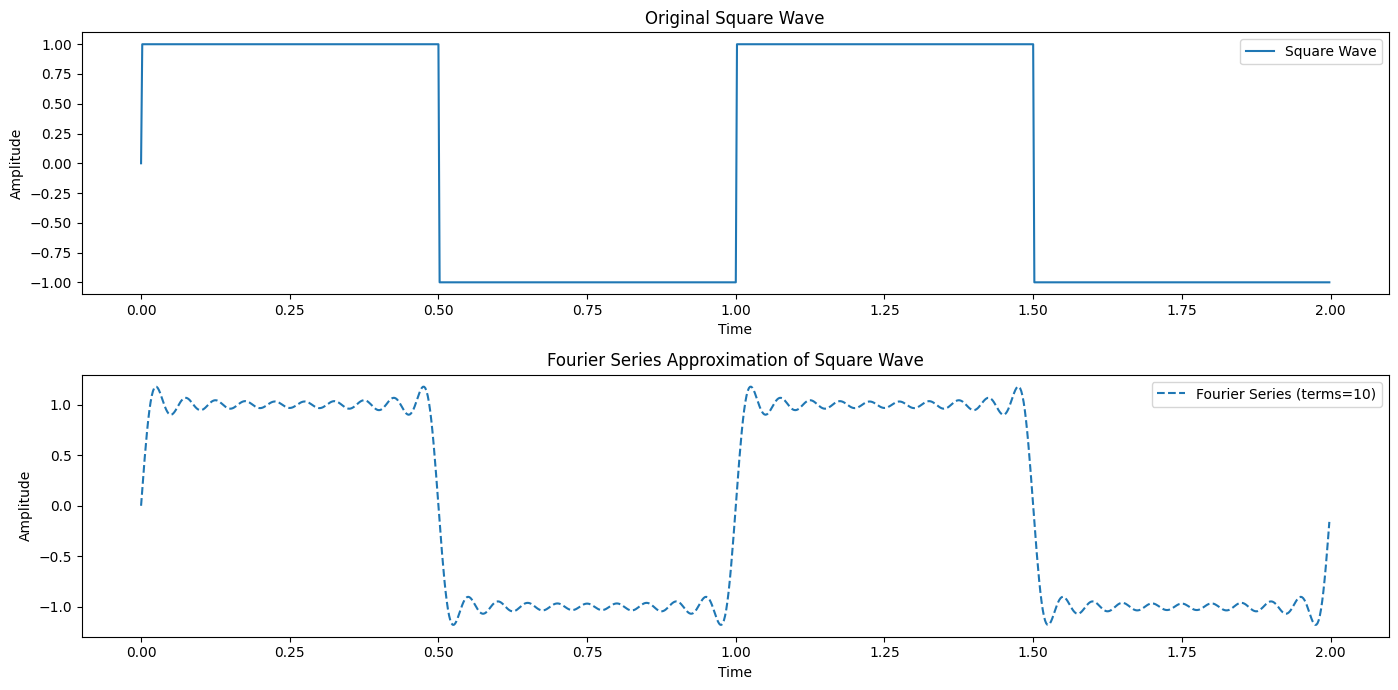

In [14]:
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(t, square_wave_values, label='Square Wave')
plt.title('Original Square Wave')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t,
         fourier_approx,
         label=f'Fourier Series (terms={num_terms})',
         linestyle='dashed')
plt.title('Fourier Series Approximation of Square Wave')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

### Alternative approach (with animation)

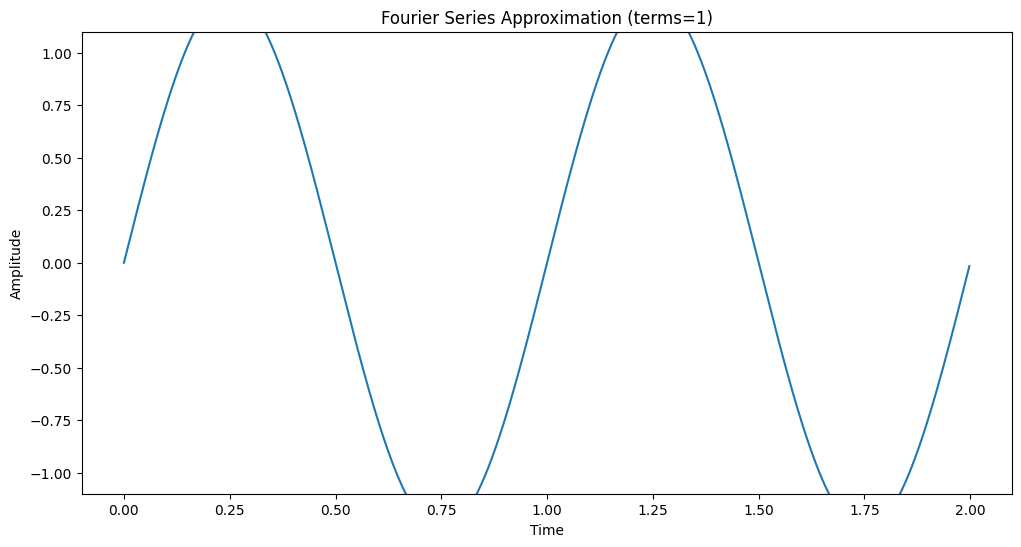

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display

def square_wave(t: float, f: float, amp: float = 1.0):
    return amp * np.sign(np.sin(2 * np.pi * f * t))

def fourier_series_square_wave(t: float, num_terms: int = 10):
    res = 0.0
    for n in range(1, num_terms + 1):
        omega = 2 * np.pi * (2 * n - 1)
        res += (4 / (np.pi * (2 * n - 1))) * np.sin(omega * t)
    return res

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))
line, = ax.plot(t, square_wave(t, f=1), label='Square Wave')
ax.set_title('Fourier Series Approximation of Square Wave')
ax.set_xlabel('Time')
ax.set_ylabel('Amplitude')

# Animation function
def animate(frame):
    num_terms = frame + 1
    fourier_approx = fourier_series_square_wave(t, num_terms)
    line.set_ydata(fourier_approx)
    ax.set_title(f'Fourier Series Approximation (terms={num_terms})')
    return line,

# Create the animation
num_frames = 30
animation = FuncAnimation(fig, animate, frames=num_frames, interval=200)

# Save animation as HTML and display with autoplay
html_code = animation.to_jshtml()
display(HTML(html_code + '<script>document.querySelector(".widget-area canvas").autoplay = true;</script>'))